In [74]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from typing import Callable

### Zad 1

In [75]:
def bisection(f : Callable[[float], float], starting_points: np.array, desired_error: float):
    x_i = starting_points[0]
    x_j = starting_points[1]
    y_i = f(x_i)
    y_j = f(x_j)

    if y_i == 0:
        return x_i

    if y_j == 0:
        return x_j

    if y_i * y_j > 0:
        raise ValueError("Invalid starting points!")

    x_middle_old = None
    x_middle = None
    current_error = 100
    while current_error > desired_error:
        x_middle_old = x_middle
        x_middle = (x_i + x_j) / 2

        # Calculate current_error
        if x_middle_old:
            current_error = np.absolute((x_middle - x_middle_old) / x_middle) * 100

        # If f(x_middle) is equalt to 0 stop calculations
        if f(x_middle) == 0.0:
            break

        # Update boundaries
        if f(x_i) * f(x_middle) > 0:
            x_i = x_middle
        else:
            x_j = x_middle



    return x_middle

In [76]:
def bisection_with_moving_window(f : Callable[[float], float], starting_points: np.array, desired_error: float, number_of_roots: int, searching_boundaries: np.array):
    starting_range = np.abs((starting_points[0]) - starting_points[1])

    roots = set()
    roots.add(bisection(f, starting_points, desired_error))

    i = 0
    # Move window to the right
    window_points = starting_points
    while len(roots) < number_of_roots and window_points[1] < searching_boundaries[1]:
        i = i +1
        window_points = window_points + starting_range
        try:
            roots.add(bisection(f, window_points, desired_error))
        except:
            pass

    # Move window to the left
    window_points = starting_points
    while len(roots) < number_of_roots and window_points[0] > searching_boundaries[0]:
        i = i +1
        window_points = window_points - starting_range
        try:
            roots.add(bisection(f, window_points, desired_error))
        except:
            pass

    return list(roots)


In [77]:
def bisection_plot(f : Callable[[float], float], starting_points: list[tuple],  roots: list, symetric = True):
    if symetric:
        x_max = np.max(np.absolute(starting_points)) + 1
        x_min = -x_max
    else:
        x_max = starting_points[1] + 1
        x_min = starting_points[0] - 1
    x = np.linspace(x_min,x_max, 50)
    y = f(x)

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.plot(x, y)

    for root in roots:
        ax.plot(root, f(root), 'o', color="red")

    ax.grid(True)

0.0

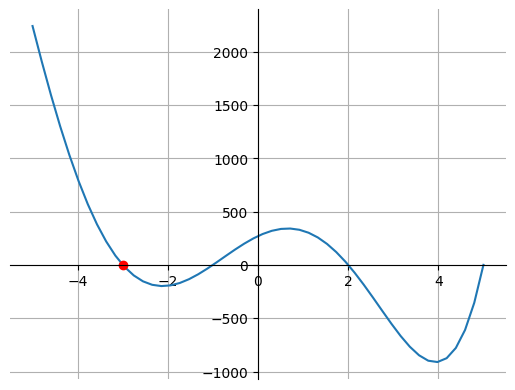

In [78]:
f = lambda x: x**5 + 6*x**4 - 42*x**3 - 116*x**2+201*x+270
starting_points = np.array([-4, -2])
error = 10e-12
root = bisection(f, starting_points, error)

bisection_plot(f, starting_points, [root])
f(root)

[0, 0.0, 0.0, 0.0, 0.0]

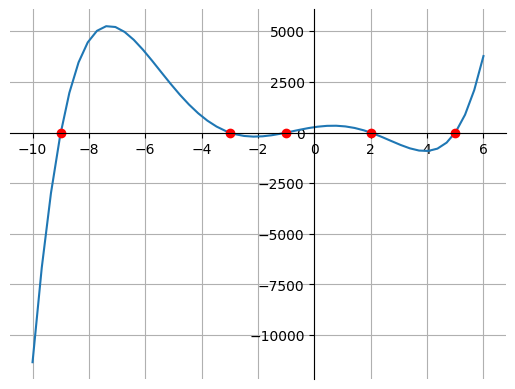

In [79]:
starting_max = np.max(np.abs(starting_points))
searching_boundaries = np.array([- starting_max * 10, starting_max * 10])
roots = bisection_with_moving_window(f, starting_points, error, 5, searching_boundaries)
bisection_plot(f, (np.min(roots), np.max(roots)), roots, False)
[f(i) for i in roots]

### Zad 2

In [80]:
def metoda_iteracyjna(mA, my, x):
    n = len(mA)
    for j in range(0, n):
        yj = my[j]
        suma = 0
        for i in range(0, n):
            if j != i:
                suma += mA[j][i] * x[i]
        x[j] = (yj - suma) / mA[j][j]

    return x

In [83]:
A = np.array([
    [6, 2, 8],
    [3, 5 ,2],
    [2, 8, 2]]
)
y = np.array([26, 18, 1])


x0 = np.zeros(3)
e = None
e_prev = None
relative_error = 100
for i in range(0, 10):
    xi = metoda_iteracyjna(A, y, x0.copy())

    x0 = xi[:]

    e_prev = e
    e = np.linalg.norm(xi)
    if e_prev:
        relative_error = np.abs((e - e_prev) / e) * 100

    print(f"Iteracja: {i}, bład względny: {relative_error:.4f}%")

print(np.linalg.solve(A, y))
print(x0)

Iteracja: 0, bład względny: 100.0000%
Iteracja: 1, bład względny: 43.1390%
Iteracja: 2, bład względny: 10.0718%
Iteracja: 3, bład względny: 8.2366%
Iteracja: 4, bład względny: 1.9683%
Iteracja: 5, bład względny: 0.9170%
Iteracja: 6, bład względny: 0.3224%
Iteracja: 7, bład względny: 0.1016%
Iteracja: 8, bład względny: 0.0498%
Iteracja: 9, bład względny: 0.0102%
[12.33333333 -1.55555556 -5.61111111]
[12.33440826 -1.5558349  -5.61106865]


### Zad 3

In [82]:
f1 = "x*y - 1"
f2 = "x + y - 2"

f1dx = sp.diff(f1, "x")
f1dy = sp.diff(f1, "y")
f2dx = sp.diff(f2, "x")
f2dy = sp.diff(f2, 'y')

# print(f1dx.evalf(subs={"y": 1}))

x = np.array([-5, 12])
iterations = 10
for i in range (0, iterations):
    J11 = f1dx.evalf(subs={"x": x[0], "y": x[1]})
    J12 = f1dy.evalf(subs={"x": x[0], "y": x[1]})
    J21 = f2dx.evalf(subs={"x": x[0], "y": x[1]})
    J22 = f2dy.evalf(subs={"x": x[0], "y": x[1]})
    F1 = eval(f1, {"x": x[0], "y": x[1]})
    F2 = eval(f2, {"x": x[0], "y": x[1]})

    jacobian = np.array([
        [np.double(J11), np.double(J12)],
        [np.double(J21), np.double(J22)]
    ])
    F = np.array([np.double(F1), np.double(F2)]) * -1

    # delta = metoda_iteracyjna(jacobian, F, x.copy())
    delta = np.linalg.solve(jacobian, F)
    x = x + delta

x1, x2 = sp.symbols('x1, x2')
sp_f1 = sp.Eq(x1*x2-1, 0)
sp_f2 = sp.Eq(x1+x2-2, 0)
sp_x = sp.nonlinsolve([sp_f1, sp_f2], (x1, x2))
sp_x_args = sp_x.args[0]
f1_val = eval(f1, {"x": x[0], "y": x[1]})
f2_val = eval(f2, {"x": x[0], "y": x[1]})
f1_sp_val = eval(f1, {"x": sp_x_args[0], "y": sp_x_args[1]})
f2_sp_val = eval(f2, {"x": sp_x_args[0], "y": sp_x_args[1]})
print(f"Metoda iteracyjna: {x}, liczba iteracji: {iterations}, rozwiązanie: f1 = {f1_val}, f2 = {f2_val}")
print(f"Sympy nonlinslove: {sp_x}, rozwiązanie: f1 = {f1_sp_val}, f2 = {f2_sp_val}")

Metoda iteracyjna: [0.99241728 1.00758272], liczba iteracji: 10, rozwiązanie: f1 = -5.749765151930042e-05, f2 = 0.0
Sympy nonlinslove: {(1, 1)}, rozwiązanie: f1 = 0, f2 = 0
